# Example usage of provided functions

Along with the dataset, the following modules are provided in the `utils` package:

- Module `data_loading`: functions to load the provided dataset and files.
  - `load_subjects_info()`: loads the `subjects_info.csv` file.
  - `load_executions_info()`: loads the `executions_info.csv` file.
  - `load_data()`: loads the dataset.
- Module `exploration`: to obtain insights about the data and the subjects.
  - `subjects_age_range()`: age range statistics.
  - `subjects_age_range_by_gender()`: age range statistics by gender.
  - `executions_by_gender()`: number of executions by gender.
  - `count_samples()`: amount of samples collected per activity and device.
- Module `visualization`: provides `plot_execution()` to plot the accelerometer and gyroscope samples of an execution.

The following sections show the usage of each function.

## Import the provided functions

In [1]:
from utils.data_loading import load_data, load_executions_info, load_subjects_info
from utils.exploration import count_samples, executions_by_gender, subjects_age_range, subjects_age_range_by_gender
from utils.visualization import plot_execution

## Subject's statistics: `subjects_info.csv`

### Load the file: `load_subjects_info()`

In [2]:
help(load_subjects_info)

Help on function load_subjects_info in module utils.data_loading:

load_subjects_info(path='DATA/subjects_info.csv')
    Loads the 'subjects_info.csv' file containing information about the subjects (age, gender, executions)
    
    Args:
        path (str): path of the file. Default: 'DATA/subjects_info.csv'
        
    Returns:
        pandas.DataFrame: dataframe with the contents of the file



In [3]:
subjects_info = load_subjects_info()
subjects_info

subject_id  age gender height weight dominant_hand  executions
0         s01   54      M    190     83             R           6
1         s02   31      M    171     71             R           9
2         s03   24      F    161     62             R          10
3         s04   51      M    174     60             R          10
4         s05   54      M    172     85             R          10
5         s06   53      M    179    110             R          10
6         s07   49      M    176     88             R          11
7         s08   63      M                                       9
8         s09   28      F    164     49             R          10
9         s10   66      F    165     72             R          10
10        s11   50      M    181     70             R          10
11        s12   46      M    181     90             R          10
12        s13   26      M    170     65             R          10
13        s14   34      M    170     65             R          10
14        s15   23      F    166     60             L          10
15        s16   25      M    173     64             R          10
16        s17   58      F    156     53             R          10
17        s18   61      M    172     97             R          10
18        s19   30      F    160     58             R          10
19        s20   58      F                                      10
20        s21   56      F                                      10
21        s22   31      F    162     70             R           9
22        s23   48      F                                       9

### Exploration

The following functions are provided to get some insights about the subjects:

#### `subjects_age_range()`
Age statistics about the subjects (mean, std, etc...)

In [4]:
help(subjects_age_range)

Help on function subjects_age_range in module utils.exploration:

subjects_age_range(info)
    Computes age range statisitcs from the subjects of the data collection.
    
    Args:
        info(pandas.DataFrame): dataframe with the information of the subjects. See: `data_loading.load_subjects_info`.
    
    Returns:
        pandas.DataFrame: dataframe with age range statistics.



In [5]:
subjects_age_range(subjects_info)

count       mean        std   min   25%   50%   75%   max
age   23.0  44.304348  14.293784  23.0  30.5  49.0  55.0  66.0

####  `subjects_age_range_by_gender()`
Age statistics about the subjects grouped by gender (mean, std, etc...).

In [6]:
help(subjects_age_range_by_gender)

Help on function subjects_age_range_by_gender in module utils.exploration:

subjects_age_range_by_gender(info)
    Computes age range statisitcs grouped by gender from the subjects of the data collection.
    
    Args:
        info(pandas.DataFrame): dataframe with the information of the subjects. See: `data_loading.load_subjects_info`.
    
    Returns:
        pandas.DataFrame: dataframe with age range statistics grouped by gender.



In [7]:
subjects_age_range_by_gender(subjects_info)

age                                                    
       count       mean        std   min   25%   50%   75%   max
gender                                                          
F       10.0  42.200000  16.551603  23.0  28.5  39.5  57.5  66.0
M       13.0  45.923077  12.750566  25.0  34.0  50.0  54.0  63.0

#### `executions_by_gender()`
Number of activity sequences executed by each gender.

In [8]:
help(executions_by_gender)

Help on function executions_by_gender in module utils.exploration:

executions_by_gender(info)
    Counts the number of executions grouped by gender.
    
    Args:
        info(pandas.DataFrame): dataframe with the information of the subjects. See: `data_loading.load_subjects_info`.
    
    Returns:
        pandas.DataFrame: dataframe with executions count grouped by gender.



In [9]:
executions_by_gender(subjects_info)

gender       F    M  Total
executions  98  125    223

## Executions metadata: `executions_info.csv`

### Load the file: `load_executions_info()`

In [10]:
help(load_executions_info)

Help on function load_executions_info in module utils.data_loading:

load_executions_info(path='DATA/executions_info.csv')
    Loads the 'executions_info.csv' file containing information about the executions (id, phone orientation, turns direction)
    
    Args:
        path (str): path of the file. Default: 'DATA/executions_info.csv'
        
    Returns:
        pandas.DataFrame: dataframe with the contents of the file



In [11]:
executions_info = load_executions_info()
executions_info

execution_id orientation first_turn second_turn
0         s01_01    back_inv          l           r
1         s01_02    back_inv          r           r
2         s01_03    back_inv          l           r
3         s01_04    back_inv          r           r
4         s01_05    back_inv          r           r
..           ...         ...        ...         ...
218       s23_05    back_inv          r           l
219       s23_06    back_inv          l           l
220       s23_07    back_inv          r           r
221       s23_08    back_inv          l           r
222       s23_09    back_inv          r           l

[223 rows x 4 columns]

## Collected dataset

### Load the dataset: `load_data()`

In [12]:
help(load_data)

Help on function load_data in module utils.data_loading:

load_data(path='DATA')
    Loads the accelerometer and gyroscope data for each execution.
    
    Args:
        path(str): root directory of the data. Default: 'DATA'.
        
    Returns:
        dict: pandas dict containing the accelerometer and gyroscope data for each execution.



In [13]:
data = load_data()

### Count data: `count_samples()`

In [14]:
help(count_samples)

Help on function count_samples in module utils.exploration:

count_samples(data_collection)
    Counts the number of collected samples for each activity and device.
    
    Args:
        data_collection(dict): collected data. Use `data_loading.load_data` to load the collected data.
        
    Returns:
        pandas.DataFrame: dataframe with the count of collected samples.



In [15]:
count_samples(data)

SEATED  STANDING_UP  WALKING  TURNING  SITTING_DOWN   TOTAL
sp   32764        27303   115069    52209         31868  259213
sw   32025        27765   117126    53180         32457  262553

### Visualization: `plot_execution()`

In [16]:
help(plot_execution)

Help on function plot_execution in module utils.visualization:

plot_execution(data_collection, execution)
    Generates an interactive plot with the accelerometer and gyroscope data of the specified execution.
    
    Args:
        data_collection(dict): dictionary containing the collected dataset. See: `data_loading.load_data`
        execution(str): execution data to plot. Format: 'sXX_YY_{sp|sw}'
        
    Returns:
        plotly.graph_objs.Figure: interactive plot



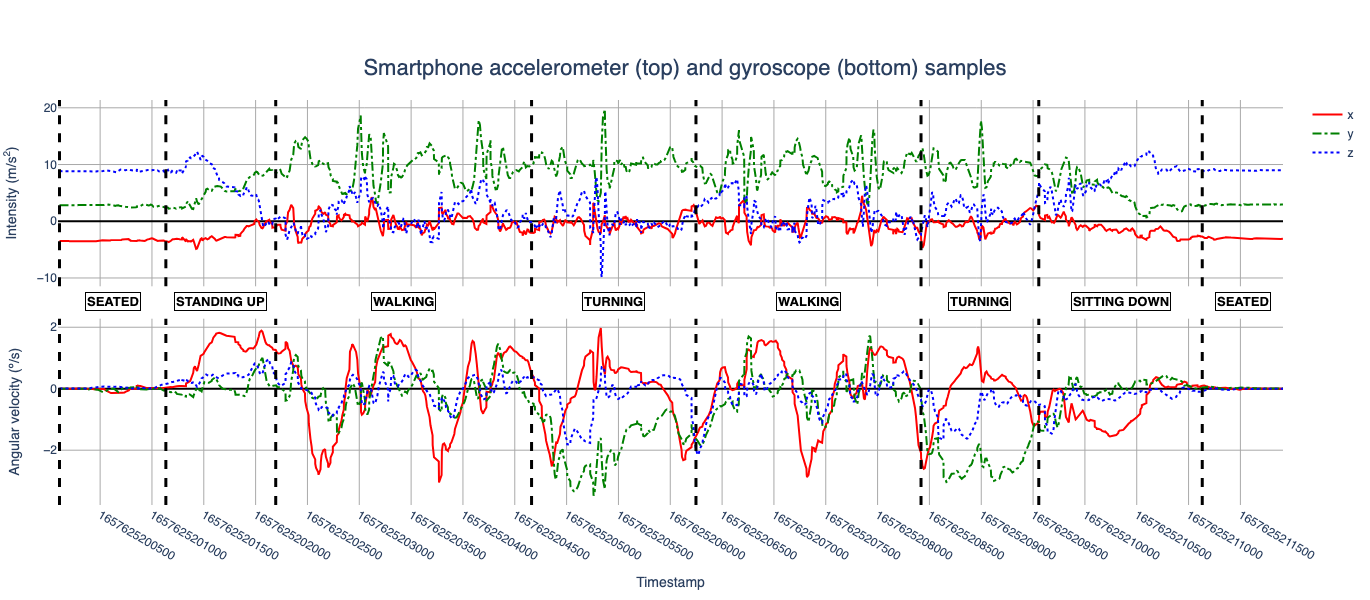

In [17]:
sp_plot = plot_execution(data, 's16_01_sp')
sp_plot

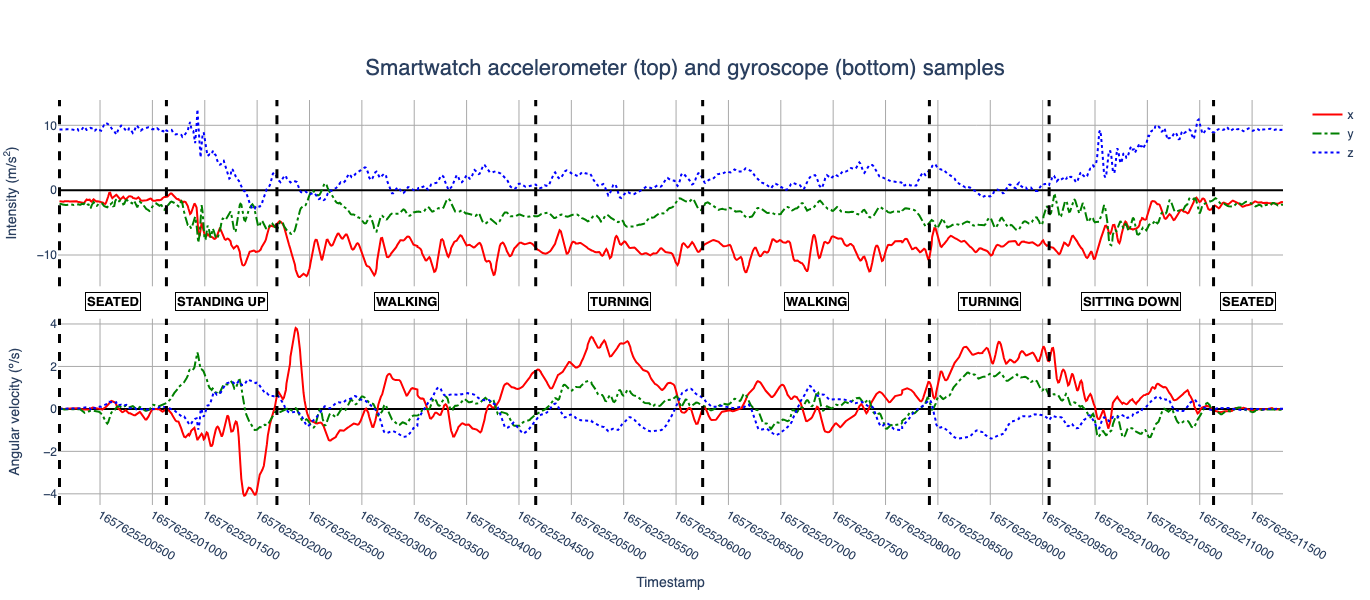

In [18]:
sw_plot = plot_execution(data, 's16_01_sw')
sw_plot